# Import de fonctions

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import sys

# import UCSL github : Unsupervised Clustering driven by Supervised Learning 
!git clone https://github.com/rlouiset/py_ucsl > /dev/null 2>&1

sys.path.append('./py_ucsl/')
from ucsl.ucsl_classifier import *
from ucsl.ucsl_regressor import *


# Import data

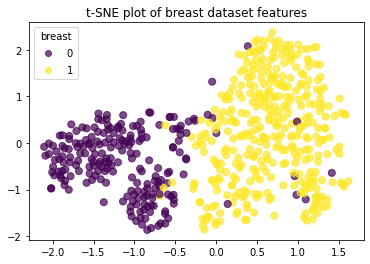

In [2]:
# load breast cancer dataset
breast_cancer = load_breast_cancer()
X_train = breast_cancer.data

# normalize training features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = breast_cancer.target

# project both on tSNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne = scaler.fit_transform(X_train_tsne)

# plot t-SNE feature projection
fig, ax = plt.subplots()
labels_map = {0:"Benign", 1: "Malignant"}
labels = [labels_map[y_i] for y_i in y_train]
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=50, alpha=0.7, label=labels)
ax.legend(*scatter.legend_elements(), title="breast")
plt.title("t-SNE plot of breast dataset features")
plt.show()

# Breast Cancer unsupervised classification

In [5]:
# UCSL training
UCSL_method = UCSL_C(stability_threshold=0.85, covariance_type='full',
                    n_consensus=50, n_iterations=30, n_clusters_per_label={0:1, 1:2})
UCSL_method = UCSL_method.fit(X_train, y_train)

# KMeans training
KMeans_method = KMeans(n_clusters=2)
KMeans_method = KMeans_method.fit(X_train[y_train==1])

# GaussianMixture training
GaussianMixture_method = GaussianMixture(n_components=2)
GaussianMixture_method = GaussianMixture_method.fit(X_train[y_train==1])


-----------------------------------------------------


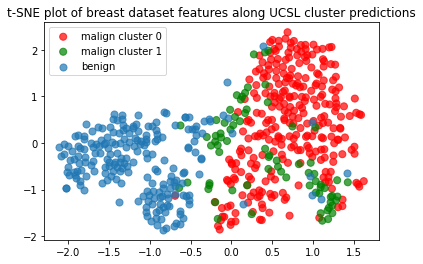

UCSL method :
mean_radius_index statistics of cluster 0 :  -0.682+/-0.504
mean_radius_index statistics of cluster 1 :  -0.105+/-0.504

mean_perimeter_index statistics of cluster 0 :  -0.691+/-0.485
mean_perimeter_index statistics of cluster 1 :  -0.115+/-0.485

mean_area_index statistics of cluster 0 :  -0.639+/-0.381
mean_area_index statistics of cluster 1 :  -0.189+/-0.381

radius_worst_index statistics of cluster 0 :  -0.702+/-0.409
radius_worst_index statistics of cluster 1 :  -0.201+/-0.409

perimeter_worst_index statistics of cluster 0 :  -0.710+/-0.402
perimeter_worst_index statistics of cluster 1 :  -0.194+/-0.402

area_worst_index statistics of cluster 0 :  -0.640+/-0.287
area_worst_index statistics of cluster 1 :  -0.278+/-0.287

-----------------------------------------------------


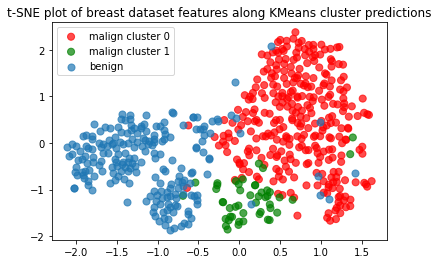

KMeans method :
mean_radius_index statistics of cluster 0 :  -0.531+/-0.504
mean_radius_index statistics of cluster 1 :  -0.764+/-0.504

mean_perimeter_index statistics of cluster 0 :  -0.552+/-0.485
mean_perimeter_index statistics of cluster 1 :  -0.705+/-0.485

mean_area_index statistics of cluster 0 :  -0.523+/-0.381
mean_area_index statistics of cluster 1 :  -0.696+/-0.381

radius_worst_index statistics of cluster 0 :  -0.572+/-0.409
radius_worst_index statistics of cluster 1 :  -0.768+/-0.409

perimeter_worst_index statistics of cluster 0 :  -0.589+/-0.402
perimeter_worst_index statistics of cluster 1 :  -0.695+/-0.402

area_worst_index statistics of cluster 0 :  -0.546+/-0.287
area_worst_index statistics of cluster 1 :  -0.688+/-0.287

-----------------------------------------------------


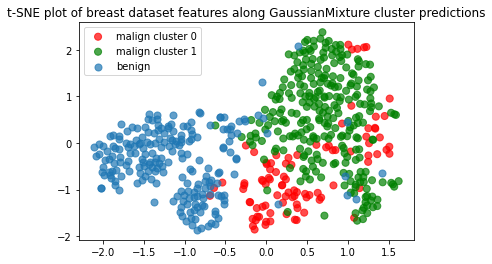

Gaussian Mixture method :
mean_radius_index statistics of cluster 0 :  -0.766+/-0.504
mean_radius_index statistics of cluster 1 :  -0.490+/-0.504

mean_perimeter_index statistics of cluster 0 :  -0.737+/-0.485
mean_perimeter_index statistics of cluster 1 :  -0.514+/-0.485

mean_area_index statistics of cluster 0 :  -0.699+/-0.381
mean_area_index statistics of cluster 1 :  -0.492+/-0.381

radius_worst_index statistics of cluster 0 :  -0.795+/-0.409
radius_worst_index statistics of cluster 1 :  -0.528+/-0.409

perimeter_worst_index statistics of cluster 0 :  -0.760+/-0.402
perimeter_worst_index statistics of cluster 1 :  -0.548+/-0.402

area_worst_index statistics of cluster 0 :  -0.704+/-0.287
area_worst_index statistics of cluster 1 :  -0.516+/-0.287

-----------------------------------------------------


In [6]:
dictionary_of_features_indexes = {
                                  'mean_radius_index':0,
                                  'mean_perimeter_index':2,
                                  'mean_area_index':3,
                                  'radius_worst_index':20,
                                  'perimeter_worst_index':22,
                                  'area_worst_index':23
                                  }

print('-----------------------------------------------------')
# UCSL predictions
y_pred = np.argmax(UCSL_method.predict_clusters(X_train[y_train==1])[1], 1)
fig, ax = plt.subplots()
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==0], X_train_tsne[y_train==1, 1][y_pred==0], c=['r']*np.sum(y_pred==0), s=50, alpha=0.7, label="malign cluster 0")
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==1], X_train_tsne[y_train==1, 1][y_pred==1], c=['g']*np.sum(y_pred==1), s=50, alpha=0.7, label="malign cluster 1")
ax.scatter(X_train_tsne[y_train==0, 0], X_train_tsne[y_train==0, 1], s=50, alpha=0.7, label="benign")
plt.legend()
plt.title("t-SNE plot of breast dataset features along UCSL cluster predictions")
plt.show()

print('UCSL method :')
for feature_name, features_index in dictionary_of_features_indexes.items() :
  print(feature_name + ' statistics of cluster 0 : ', str(np.mean(X_train[y_train==1][y_pred==0, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][:, features_index]))[:5])
  print(feature_name + ' statistics of cluster 1 : ', str(np.mean(X_train[y_train==1][y_pred==1, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][:, features_index]))[:5])
  print('')
print('-----------------------------------------------------')

# KMeans predictions
y_pred = KMeans_method.predict(X_train[y_train==1])
fig, ax = plt.subplots()
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==0], X_train_tsne[y_train==1, 1][y_pred==0], c=['r']*np.sum(y_pred==0), s=50, alpha=0.7, label="malign cluster 0")
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==1], X_train_tsne[y_train==1, 1][y_pred==1], c=['g']*np.sum(y_pred==1), s=50, alpha=0.7, label="malign cluster 1")
ax.scatter(X_train_tsne[y_train==0, 0], X_train_tsne[y_train==0, 1], s=50, alpha=0.7, label="benign")
plt.legend()
plt.title("t-SNE plot of breast dataset features along KMeans cluster predictions")
plt.show()

print('KMeans method :')
for feature_name, features_index in dictionary_of_features_indexes.items() :
  print(feature_name + ' statistics of cluster 0 : ', str(np.mean(X_train[y_train==1][y_pred==0, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][:, features_index]))[:5])
  print(feature_name + ' statistics of cluster 1 : ', str(np.mean(X_train[y_train==1][y_pred==1, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][:, features_index]))[:5])
  print('')
print('-----------------------------------------------------')

# GaussianMixture predictions
y_pred = GaussianMixture_method.predict(X_train[y_train==1])
fig, ax = plt.subplots()
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==0], X_train_tsne[y_train==1, 1][y_pred==0], c=['r']*np.sum(y_pred==0), s=50, alpha=0.7, label="malign cluster 0")
ax.scatter(X_train_tsne[y_train==1, 0][y_pred==1], X_train_tsne[y_train==1, 1][y_pred==1], c=['g']*np.sum(y_pred==1), s=50, alpha=0.7, label="malign cluster 1")
ax.scatter(X_train_tsne[y_train==0, 0], X_train_tsne[y_train==0, 1], s=50, alpha=0.7, label="benign")
plt.legend()
plt.title("t-SNE plot of breast dataset features along GaussianMixture cluster predictions")
plt.show()

print('Gaussian Mixture method :')
for feature_name, features_index in dictionary_of_features_indexes.items() :
  print(feature_name + ' statistics of cluster 0 : ', str(np.mean(X_train[y_train==1][y_pred==0, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][:, features_index]))[:5])
  print(feature_name + ' statistics of cluster 1 : ', str(np.mean(X_train[y_train==1][y_pred==1, features_index]))[:6] + '+/-' + str(np.std(X_train[y_train==1][:, features_index]))[:5])
  print('')
print('-----------------------------------------------------')